In [ ]:
import yfinance as yf
import pandas as pd


In [ ]:
df = yf.download('WIPRO.NS')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS
Date,,,,,
1996-01-01,0.503110,0.503110,0.503110,0.503110,39999
1996-01-02,0.463979,0.463979,0.463979,0.463979,79999
1996-01-03,0.480749,0.480749,0.480749,0.480749,39999
1996-01-04,0.480749,0.480749,0.480749,0.480749,239999
1996-01-05,0.480749,0.480749,0.480749,0.480749,0


In [ ]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS
Date,,,,,
2025-04-22,234.149994,239.000000,233.500000,238.449997,18367713
2025-04-23,243.600006,245.350006,236.100006,237.199997,31898042
2025-04-24,242.750000,245.149994,241.500000,244.800003,23000820
2025-04-25,240.899994,246.149994,238.050003,243.949997,16620430
2025-04-28,240.500000,241.949997,238.750000,240.500000,14216208


In [ ]:
!pip install tensorflow

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM



Historical Data Visualisation

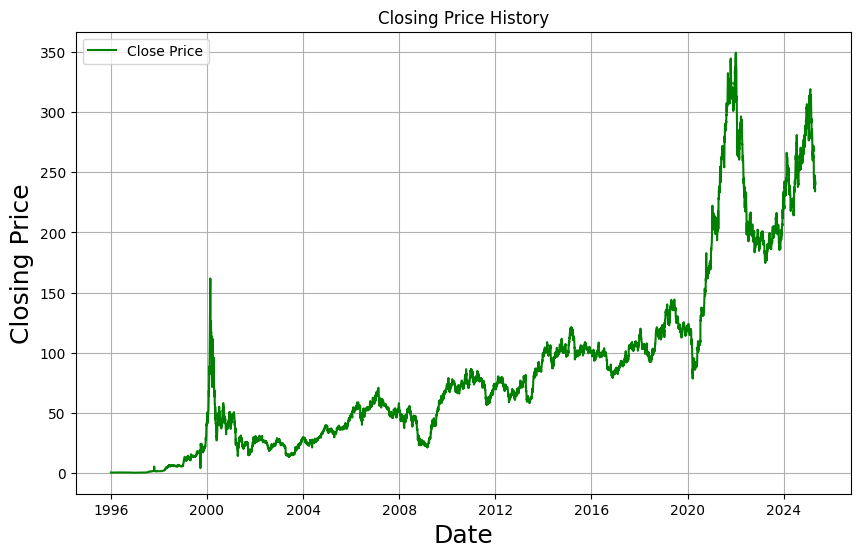

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Closing Price History')
plt.plot(df['Close'], label='Close Price', color='green')
plt.ylabel('Closing Price', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetch historical data with safety check
df = yf.download('WIPRO.NS', start='2023-01-01', end='2024-01-01')

if df.empty:
    raise ValueError("No data fetched. Check ticker symbol, date range, or connection.")

# Filter and scale
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

scaled_data



[*********************100%***********************]  1 of 1 completed


array([[0.31176584],
       [0.34643299],
       [0.28273238],
       [0.2584654 ],
       [0.21599833],
       [0.30093248],
       [0.31176584],
       [0.31869938],
       [0.32433279],
       [0.31913257],
       [0.35986633],
       [0.34036638],
       [0.39973343],
       [0.40146675],
       [0.39929997],
       [0.43266699],
       [0.43788019],
       [0.3940051 ],
       [0.36359661],
       [0.40008686],
       [0.37054746],
       [0.40138995],
       [0.46264121],
       [0.44917461],
       [0.42093831],
       [0.38488261],
       [0.43918329],
       [0.45264962],
       [0.43092935],
       [0.38575143],
       [0.42484787],
       [0.4448305 ],
       [0.46655077],
       [0.43527346],
       [0.44178949],
       [0.40443096],
       [0.33840132],
       [0.32797573],
       [0.32232826],
       [0.29669842],
       [0.26802758],
       [0.30191135],
       [0.27671579],
       [0.29756752],
       [0.32623809],
       [0.31624678],
       [0.2945265 ],
       [0.285

In [ ]:
def create_sequence(data, seq_length):


  x,y=[],[]
  for i in range (len(data)-seq_length ):
    x.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(x), np.array(y)


SEQ_LEN = 30
x,y = create_sequence(scaled_data, SEQ_LEN)


In [ ]:
# After creating sequences X, y
split_idx = max(int(0.8 * len(x)), 1)  # Ensure at least 1 training sample
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Make sure x_test is never zero size
if len(x_test) == 0:
    print("Warning: Not enough test samples. Adjusting...")
    x_train, x_test = x[:-1], x[-1:]
    y_train, y_test = y[:-1], y[-1:]

x.shape

(215, 30, 1)

In [ ]:
scaled_data
split = math.ceil(len(scaled_data)*0.8)


In [ ]:
x_train = x[:split]
x_test = x[split:]
y_train = y[:split]
y_test = y[split:]

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)


modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(70, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.1),
    LSTM(70),
    Dropout(0.1),
    Dense(1),
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
x.shape
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(x_train, y_train, batch_size = 32, epochs=30, validation_data=(x_test, y_test))
print(f"Total samples: {len(x)}")
print(f"Training samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - loss: 0.0071 - val_loss: 0.0278
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0066 - val_loss: 0.0364
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0064 - val_loss: 0.0175
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0051 - val_loss: 0.0286
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0060 - val_loss: 0.0195
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0053 - val_loss: 0.0207
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0054 - val_loss: 0.0217
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0049 - val_loss: 0.0146
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0045 - val_loss: 0.0151
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0053 - val_loss: 0.0167
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0039 - val_loss: 0.0141
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0044 - val_loss: 0.0169


In [ ]:
y_pred = model.predict(x_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Add RMSE calculation
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Root Mean Squared Error (RMSE): 6.25


Visualisation

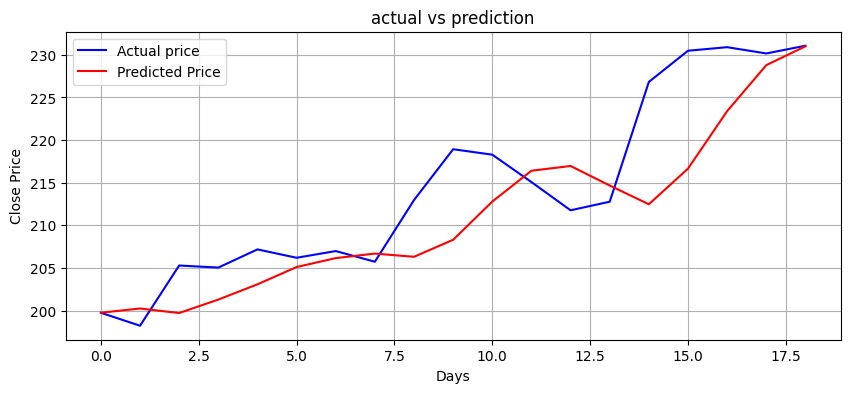

In [ ]:
plt.figure(figsize=(10,4))
plt.title('actual vs prediction')
plt.plot(y_test_rescaled,label = 'Actual price',color = 'blue')
plt.plot(y_pred_rescaled,label = 'Predicted Price',color = 'red')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
